# Artificial Intelligence
## Assignment 4 – Decision Making

### Personal details

* **Name:** Ahmed Jabir Zuhayr

In this assignment you will implement multiple agents for playing a simple card game. We will consider how to define agents with different preferences and decision making strategies.

In [1]:
# Dependencies:
# pip install matplotlib

import random

### 4.1 – Double or Nothing

![game.png](game.png)

<small>Image generated with the "Imagen 4.0 Ultra Generate Preview 06-06 v2" model on LMArena</small>

You are at a casino and have just won a game of Poker against the house. You're given the option to play a game of *Double or Nothing*, where you can either double your winnings or lose them all. The game is played as follows:

1. You start with your winnings from the Poker game (this is randomly generated).
2. A random card is drawn from a standard deck with no jokers. Ace will always be considered the highest card.
3. You will have the option to either:
   - Draw another card, which will double your winnings if the card is higher than the first card, or lose all your winnings if it is lower. If the card is equal, new cards will be drawn.
   - Stop playing, in which case you keep your current winnings.
4. The game continues until you either stop playing or lose all your winnings or the deck is empty. Drawn cards are not returned to the deck.

The game logic has been implemented for you in `ex4_utils.py`.

In [2]:
from ex4_utils import Deck, get_value, play, quick_play

We begin by defining a general `Agent` class that different agents will inherit from. All agents will have randomized initial winnings as well as a method for making decisions based on their preferences and strategies.

In [3]:
class Agent:
    """
    This is the base class for all agents. It should not be instantiated directly.
    """
    def __init__(self):
        initial_bets = [100, 300, 400, 500, 1000, 2000, 5000, 10000]
        self._winnings = random.sample(initial_bets, counts=[25, 15, 10, 8, 5, 3, 2, 1], k=1)[0]

    @property
    def winnings(self):
        """
        This is the pythonic equivalent of a getter method. With this,
        you can directly access the `_winnings` attribute despite it being protected,
        but you cannot set it directly (no cheating!)
        """
        return self._winnings 

    def get_action(self):
        raise NotImplementedError("This method should be overridden by subclasses. This is done by simply redefining the method in the subclass.")

Next we define an agent that will let you get a feel for the game. This agent will simply prompt the user for its decisions.

In [4]:
class PlayerAgent(Agent):
    def __init__(self):
        super().__init__() # use the parent class' constructor

    def get_action(self):
        action = input("Do you want to draw or quit? (d/q): ").strip().lower()
        while action not in ["d", "q"]:
            action = input("Invalid action. Please enter 'd' or 'q': ").strip().lower()
        if action == "d":
            return 1 # draw
        else:
            return 0 # quit

We used **inheritance** to create a `PlayerAgent` that extends the `Agent` class. The syntax `class PlayerAgent(Agent)` corresponds to `class PlayerAgent extends Agent` in Java. This allows `PlayerAgent` to inherit all methods and attributes from the parent class, while also allowing us to define additional methods specific to the child class.

The game only requires an agent program and a deck as its input and can now be played by running the following code:

In [5]:
# ---------- YOU MAY COMMENT OUT THIS BLOCK IF YOU WISH ----------- #
# agent = PlayerAgent()
# deck = Deck()
# play(agent, deck)
# ---------- YOU MAY COMMENT OUT THIS BLOCK IF YOU WISH ----------- #

**Task 1: Trivial agents (0.2 pt)**

Your first task is to implement two mindless agents:

1. `QuitterAgent`: an agent who is always satisfied with their initial winnings and will never play Double or Nothing.
2. `CrazyRiskSeekerAgent`: a multimillionaire agent that only cares about their winnings once they exceed *one million*. If their winnings are below that, they will always draw another card, regardless of the first card drawn. If their winnings exceed one million, they will quit the game.

Both agents should inherit from the `Agent` class and override the `get_action` method which returns `1` for drawing another card and `0` for quitting the game.

In [6]:
class QuitterAgent(Agent):
    def __init__(self):
        super().__init__()

    # ---------- YOUR CODE HERE ----------- #
    def get_action(self):
        return 0
    # ---------- YOUR CODE HERE ----------- #

In [7]:
class CrazyRiskSeekerAgent(Agent):
    def __init__(self):
        super().__init__()

    # ---------- YOUR CODE HERE ----------- #
    def get_action(self):
        if self._winnings <= 1_000_000:
            return 1
        return 0
    # ---------- YOUR CODE HERE ----------- #

We've implemented a `quick_play` method that removes all print statements and delays, allowing you to test your agents over many runs of the game quickly. It also displays a histogram of the winnings over all games played.

In [8]:
# ---------- YOU MAY COMMENT OUT THIS BLOCK IF YOU WISH ----------- #
quitter_agent = QuitterAgent()
deck = Deck()
play(quitter_agent, deck)
# ---------- YOU MAY COMMENT OUT THIS BLOCK IF YOU WISH ----------- #

You have an initial bet of 2000.
Welcome to the Double or Nothing card game!
A random card will be drawn. You can attempt to double your bet by drawing a higher card, or you can quit at any time.
Drawn: A|♣
You chose to quit the game.
Your final winnings are: 2000. Thank you for playing!


Winnings: 133519900
Runs: 200002
Average winnings: 668


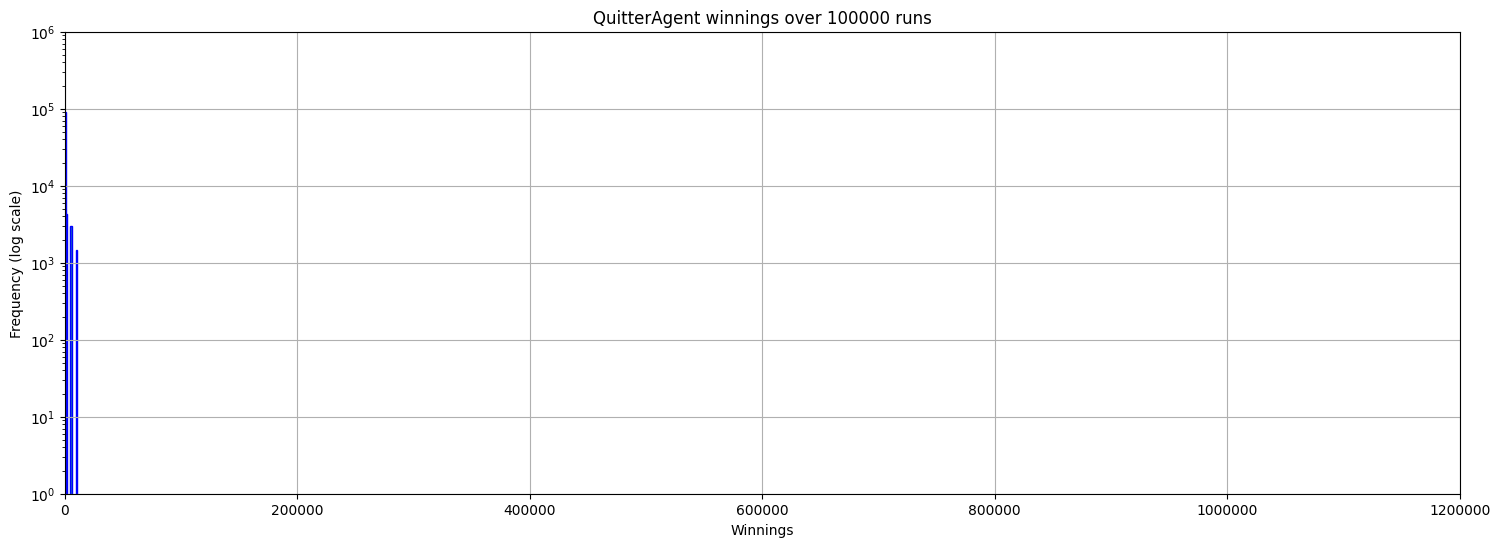

In [9]:
quitter_agent = QuitterAgent()
deck = Deck()
quick_play(quitter_agent, deck, runs=100000)

In [10]:
# ---------- YOU MAY COMMENT OUT THIS BLOCK IF YOU WISH ----------- #
risk_agent = CrazyRiskSeekerAgent()
deck = Deck()
play(risk_agent, deck)
# ---------- YOU MAY COMMENT OUT THIS BLOCK IF YOU WISH ----------- #

You have an initial bet of 10000.
Welcome to the Double or Nothing card game!
A random card will be drawn. You can attempt to double your bet by drawing a higher card, or you can quit at any time.
Drawn: A|♠
You drew: 2|♥
You lose everything.
Your final winnings are: 0. Thank you for playing!


Winnings: 139315200
Runs: 200002
Average winnings: 697


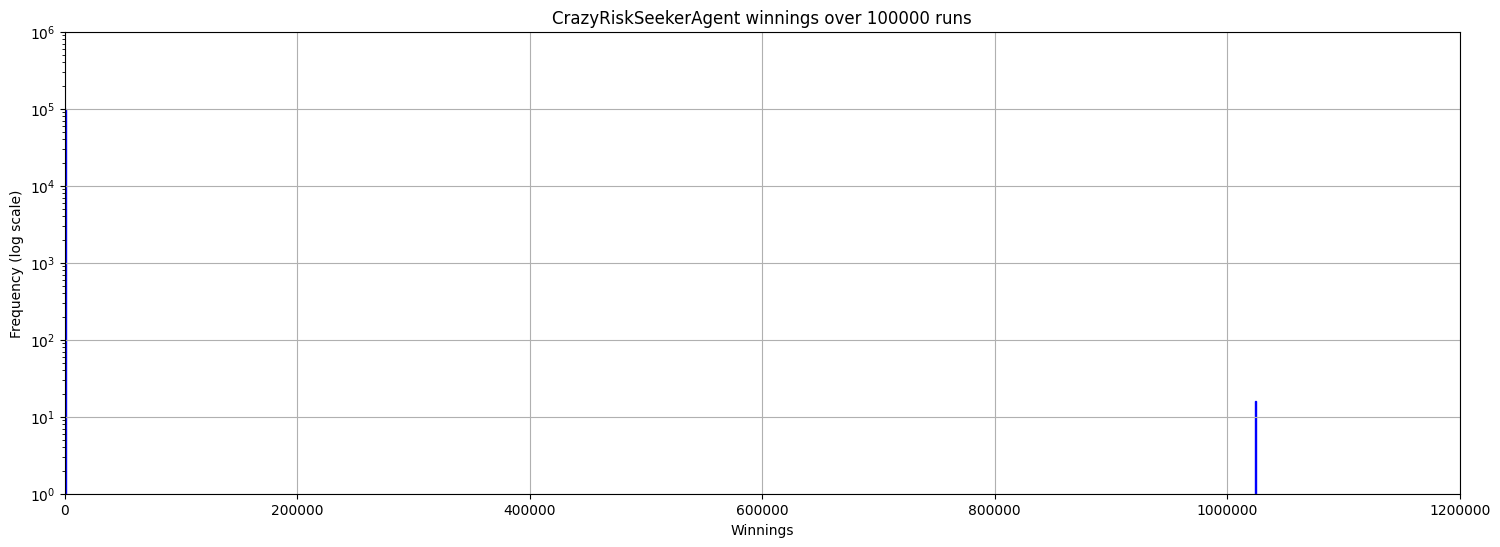

In [11]:
risk_agent = CrazyRiskSeekerAgent()
deck = Deck()
quick_play(risk_agent, deck, runs=100000)

The winnings of `QuitterAgent` should include only the initial winnings (100–10000), while `CrazyRiskSeekerAgent` should have two peaks: one at zero and another near one million. Notice that the histograms use logarithmic scaling, meaning that higher peaks correspond to *much* higher frequencies of that value.

You may also want to take a look at the `..._stats.txt` files that have appeared in your directory. These files contain the average winnings and the number of games played for each agent and will continue to update if you run the cells again. Note that *if you make changes to your corresponding agent later on, you'll want to delete these files for them to be re-initiatilized.*

The average winnings of both `QuitterAgent` and `CrazyRiskSeekerAgent` should converge to more or less the same value as the number of games increases (take a moment to think about why this is the case!)

### 4.2 – Decision Theory

The main principle of decision theory is for agents to make choices that maximize their **expected utility**. The expected utility $EU$ of an action $a$ is the sum of the utilities $U$ of all possible outcomes $s_i$ of that action, weighted by the probabilities $P$ of those outcomes:

$$EU(a) = \sum_{i} P(s_i | a) U(s_i)$$

**Task 2: Rational agent (0.5 pt)**

Your second task is to implement a `RationalAgent` that uses decision theory to maximize its expected utility. You will now need to take into account the probabilities of drawing higher or lower cards and the utilities associated with each outcome. The average winnings of this agent should converge to ~$1400$.

*NOTE: It is possible to implement the decision-making logic for this agent simply by counting the number of higher and lower cards remaining in the deck and returning the action based on which number is bigger. However, as this approach is insufficient for the next task, making use of utility calculations is required for full points.*


In [12]:
class RationalAgent(Agent):
    def __init__(self, deck):
        super().__init__()
        self.deck = deck
        self.drawn = None

    def U(self, winnings):
        """
        Calculates the utility of a given amount of winnings.
        """
        return winnings # this agent exhibits risk-neutral behavior, so the utility function is simply the winnings

    def get_action(self):
        deck_values = [get_value(card[0]) for card in self.deck.cards]
        num_of_higher = sum(1 for value in deck_values if value > self.drawn) # this many cards higher than the drawn card remain in the deck
        num_of_lower = sum(1 for value in deck_values if value < self.drawn) # this many cards lower than the drawn card remain in the deck

        # ---------- YOUR CODE HERE ----------- #
        # 1. Define the utility of each possible outcome
        # e.g. U_win = self.U(...)
        U_win = self.U(self._winnings * 2)
        U_lose = self.U(0)
        U_stop = self.U(self._winnings)

        # 2. Calculate the probabilities of the outcomes
        p_higher = num_of_higher / len(deck_values)

        # 3. Calculate the expected utility of each possible action
        eu_draw = (p_higher * U_win) + ((1 - p_higher) * U_lose)
        eu_stop = U_stop

        # 4. Return the action with the highest expected utility
        if eu_draw > eu_stop:
            return 1
        else:
            return 0
        # ---------- YOUR CODE HERE ----------- #

There is a lot more variation in the results of this agent compared to the previous ones, so we should increase the number of games played for better statistics. Running a million simulations should take around one minute on a mid-range PC or the CSC platform.

In [13]:
# ---------- YOU MAY COMMENT OUT THIS BLOCK IF YOU WISH ----------- #
deck = Deck()
rational_agent = RationalAgent(deck)
play(rational_agent, deck)
# ---------- YOU MAY COMMENT OUT THIS BLOCK IF YOU WISH ----------- #

You have an initial bet of 100.
Welcome to the Double or Nothing card game!
A random card will be drawn. You can attempt to double your bet by drawing a higher card, or you can quit at any time.
Drawn: Q|♦
You chose to quit the game.
Your final winnings are: 100. Thank you for playing!


Winnings: 2501968300
Runs: 2000003
Average winnings: 1251


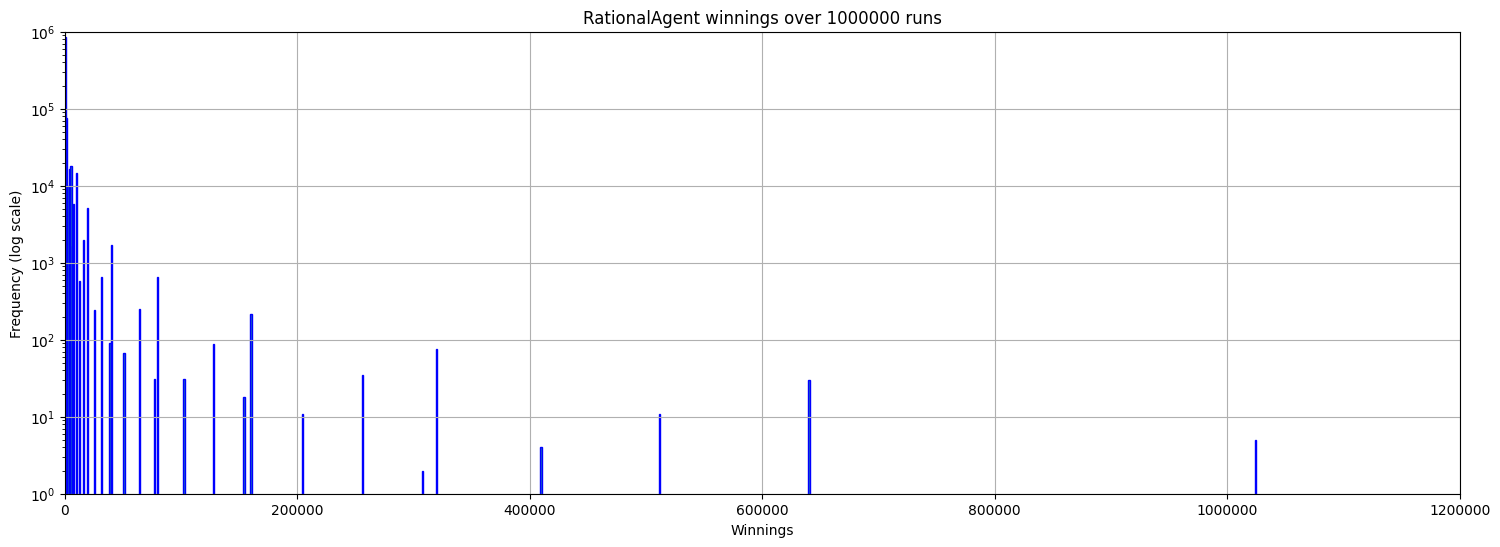

In [14]:
deck = Deck()
rational_agent = RationalAgent(deck)
quick_play(rational_agent, deck, runs=1000000)

While the winnings of `RationalAgent` should still skew towards lowers values, there should also be a significant number of games where the agent wins big.

**Task 3: Risk-averse agent (0.3 pt)**

Finally, you will implement a `RiskAverseAgent` that is similar to the `RationalAgent`, but with a utility function that attempts to imitate the risk-averse behavior of most human players. The average winnings of this agent should converge to ~1250.

(Hint: check the lecture slides or chapter 15.3: *Utility Functions* of the textbook for inspiration.)

In [15]:
import math # you might need this...

In [16]:
class RiskAverseAgent(Agent):
    def __init__(self, deck):
        super().__init__()
        self.deck = deck
        self.drawn = None

    def set_drawn(self, drawn):
        self.drawn = drawn

    def U(self, winnings):
        # ---------- YOUR CODE HERE ----------- #
        if winnings <= 0:
            return 0
        return math.log(winnings + 1)
        # ---------- YOUR CODE HERE ----------- #

    def get_action(self):
        deck_values = [get_value(card[0]) for card in self.deck.cards]
        num_of_higher = sum(1 for value in deck_values if value > self.drawn) # this many cards higher than the drawn card remain in the deck
        num_of_lower = sum(1 for value in deck_values if value < self.drawn) # this many cards lower than the drawn card remain in the deck

        # ---------- YOUR CODE HERE ----------- #
        p_higher = num_of_higher / len(deck_values)
        p_loss = 1 - p_higher

        # 1. Define the utility of each possible outcome
        # e.g. U_win = self.U(...)
        U_win = self.U(self._winnings * 2)
        U_lose = self.U(0)
        U_stop = self.U(self._winnings)

        # 2. Calculate the probabilities of the outcomes
        p_higher = num_of_higher / len(deck_values)

        # 3. Calculate the expected utility of each possible action
        eu_draw = (p_higher * U_win) + ((1 - p_higher) * U_lose)
        eu_stop = U_stop

        # 4. Return the action with the highest expected utility
        if eu_draw > eu_stop:
            return 1
        else:
            return 0
        # ---------- YOUR CODE HERE ----------- #

In [17]:
# ---------- YOU MAY COMMENT OUT THIS BLOCK IF YOU WISH ----------- #
deck = Deck()
risk_averse_agent = RiskAverseAgent(deck)
play(risk_averse_agent, deck)
# ---------- YOU MAY COMMENT OUT THIS BLOCK IF YOU WISH ----------- #

You have an initial bet of 500.
Welcome to the Double or Nothing card game!
A random card will be drawn. You can attempt to double your bet by drawing a higher card, or you can quit at any time.
Drawn: 6|♥
You chose to quit the game.
Your final winnings are: 500. Thank you for playing!


Winnings: 1444056200
Runs: 2000002
Average winnings: 722


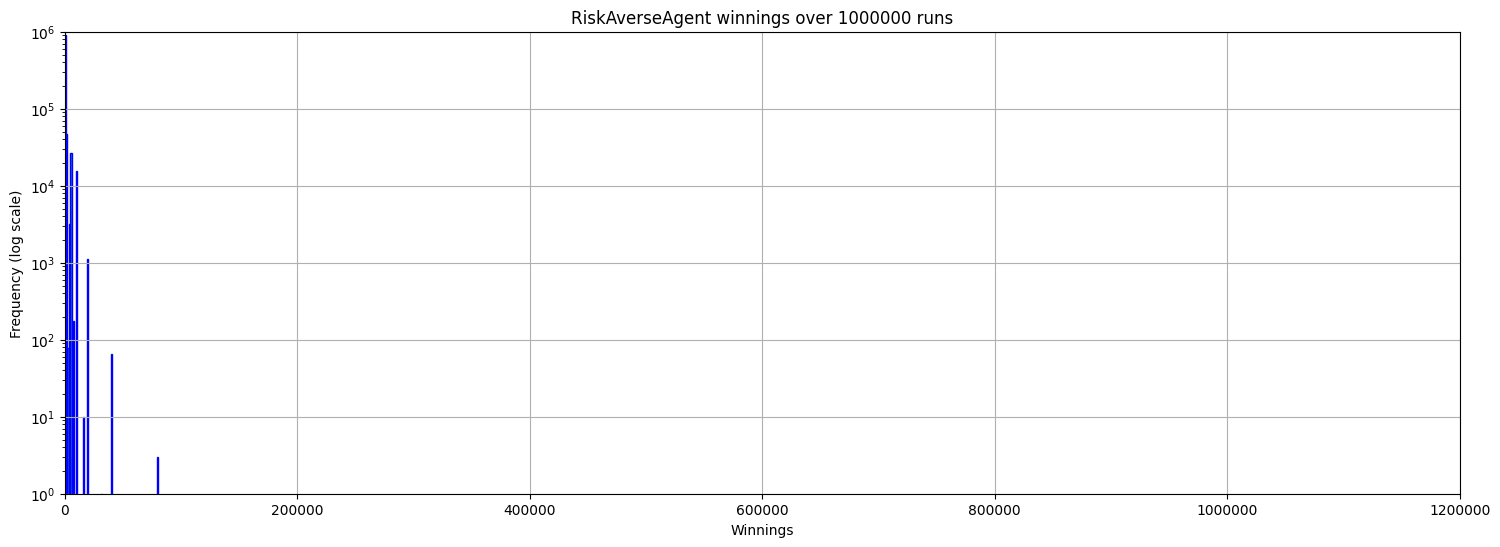

In [18]:
deck = Deck()
risk_averse_agent = RiskAverseAgent(deck)
quick_play(risk_averse_agent, deck, runs=1000000)

The winnings of this agent should differ from the `RationalAgent` in that they should skew heavier towards lower values. It should also have a lower peak at zero winnings, though this might be imperceptible on a logarithmic scale. This is because the agent is less likely to take risks that lead to high winnings, but also less likely to lose everything.

### EXTRA: Discussion

**Can you think of any way to exceed the average winnings of the `RationalAgent` in the long run? If so, how could you achieve this? If not, why do you think that is?**

The agent already chooses the action with the maximum expected utility.

Any deviation from that rule (e.g., stopping when 𝑝 > 0.5 would lower expected winnings by definition. Over many repetitions, linear expectation is additive, so maximizing expectation at each step also maximizes the expected total.

Therefore, within its own model of rationality, the agent is already optimal and cannot exceed the average winnings.

Any alternative strategy that behaves more conservatively or aggressively must, by definition, sacrifice expected value in favor of some other criterion.

## Aftermath

Please provide short answers to the following questions:

**1. Did you experience any issues or find anything particularly confusing?**

No

**2. Is there anything you would like to see improved in the assignment?**

No

### Submission

1. Make sure you have completed all tasks and filled in your personal details at the top of this notebook.
2. Ensure all the code runs without errors: restart the kernel and run all cells in order.
3. Submit *only* this notebook (`ex4.ipynb`) on Moodle.
